In [14]:
! pip install h5py

In [ ]:
import os
import h5py


In [16]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [17]:
os.getcwd()

'/Users/ruilu/Shop-Till-You-Drop/notebook'

In [18]:
data_path = "/Users/ruilu/Shop-Till-You-Drop/data"
os.listdir(data_path)


['fashiongen_256_256_validation.h5', 'fashiongen_256_256_train.h5']

In [19]:
train_path = f"{data_path}/fashiongen_256_256_train.h5"
val_path = f"{data_path}/fashiongen_256_256_validation.h5"


In [23]:
### Examine the training data set 

example_data = {}  # dictionary to store sample rows

print("\n\n\t\tTRAINING DATASET\n")

with h5py.File(train_path, 'r') as f:
    print("Datasets contained in this file:")
    print(list(f.keys()))  # list all datasets inside the H5 file

    print("\nNumber of datasets (columns):", len(f))

    first_key = list(f.keys())[0]
    num_records = f[first_key].shape[0]
    print("Number of records (rows):", num_records)

    # Extract the first 10 records from each dataset
    for key in f.keys():
        dataset = f[key]
        example_data[key] = dataset[:10]





		TRAINING DATASET

Datasets contained in this file:
['index', 'index_2', 'input_brand', 'input_category', 'input_composition', 'input_concat_description', 'input_department', 'input_description', 'input_gender', 'input_image', 'input_msrpUSD', 'input_name', 'input_pose', 'input_productID', 'input_season', 'input_subcategory']

Number of datasets (columns): 16
Number of records (rows): 260490


In [24]:
### Examine the Validation data set 
print("\n\n\t\tVALIDATION DATASET\n")

with h5py.File(val_path, 'r') as f:
    print("Datasets contained in this file:")
    print(list(f.keys()))  # list all datasets inside the H5 file

    print("\nNumber of datasets (columns):", len(f))

    first_key = list(f.keys())[0]
    num_records = f[first_key].shape[0]
    print("Number of records (rows):", num_records)



		VALIDATION DATASET

Datasets contained in this file:
['index', 'index_2', 'input_brand', 'input_category', 'input_composition', 'input_concat_description', 'input_department', 'input_description', 'input_gender', 'input_image', 'input_msrpUSD', 'input_name', 'input_pose', 'input_productID', 'input_season', 'input_subcategory']

Number of datasets (columns): 16
Number of records (rows): 32528


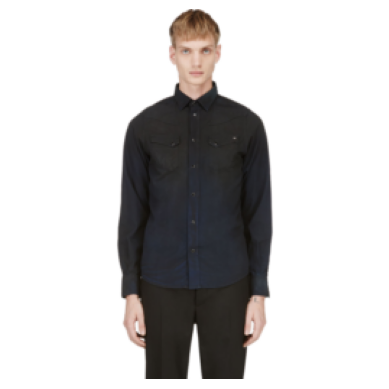

index : [0]
index_2 : 0
input_brand : Diesel
input_category : SHIRTS
input_composition : 100% cotton.
input_concat_description : Long sleeve coated denim shirt in indigo blue. Irregular overdye effect throughout in black. Spread collar. Flap pockets at breast, one with metallic logo piece. Press-stud closure at front. Tonal stitching. Three press-studs at barrel cuffs. Long sleeve suede jacket in black. Tonal grained leather paneling throughout. Stand collar. Zip closure and zippered welt pockets at front. Zippered vents at back hem. Welt pockets at interior. Fully lined. Tonal stitching. Zippered expansion panels at sleeve cuffs. Slim-fit cropped pleated wool trousers in black. Four-pocket styling. Tonal stitching. Button-fly.
input_department : CLOTHING
input_description : Long sleeve coated denim shirt in indigo blue. Irregular overdye effect throughout in black. Spread collar. Flap pockets at breast, one with metallic logo piece. Press-stud closure at front. Tonal stitching. Three 

In [28]:
### Examine of one data point
import matplotlib.pyplot as plt
plt.imshow(example_data["input_image"][0])
plt.axis('off')
plt.show()

for k, v in example_data.items():
    if k != "input_image":
        record = v[0]
    
        # Nếu giá trị là mảng bytes (chuỗi dạng b'...')
        if isinstance(record, (bytes, bytearray)):
            record = record.decode("utf-8")
    
        # Nếu là mảng có nhiều phần tử (ví dụ [[b'...']])
        elif hasattr(record, "__len__") and len(record) == 1 and isinstance(record[0], (bytes, bytearray)):
            record = record[0].decode("utf-8")
    
        print(f"{k} :", record)